In [24]:
!pip install celluloid -q


### Imports

In [25]:
import os
import gc
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import HTML, display

import numpy as np
import pandas as pd
from tqdm import tqdm
from celluloid import Camera

### Functions & Variables

In [26]:
train_volumes_path_template = '../vesuvius-challenge-ink-detection/train/{}/surface_volume/'
test_volumes_path_template = '../vesuvius-challenge-ink-detection/test/{}/surface_volume/'
tif_template = "{:02d}.tif"


In [27]:
def load_volume(volume_path: str) -> np.ndarray:
    volume = []
    layers_count = len([f for f in os.listdir(volume_path) if os.path.isfile(os.path.join(volume_path, f))])

    for i in tqdm(range(layers_count)):
        img = Image.open(f"{volume_path}/{tif_template.format(i)}")
        arr = np.array(img)
        volume.append(arr)
    
    return volume

In [28]:
def animate_volume(volume: np.ndarray) -> None:
    plt.rcParams['figure.dpi'] = 350
    plt.style.use('dark_background')

    fig, ax = plt.subplots() # creating figure subplot
    camera = Camera(fig) # define the camera that gets the fig we'll plot
    layers_count = len(volume)
    
    for i in range(layers_count):
        ax.axis('off')
        ax.text(0.5, 1.05, f"Layer {i+1}/{layers_count}", transform=ax.transAxes, horizontalalignment='center', fontsize=18)

        ax.imshow(volume[0], cmap='gray') # plot volume layer
        camera.snap() # the camera takes a snapshot of the plot
        
        del volume[0]
        gc.collect()

    plt.close(fig) # close figure

    animation = camera.animate() # get plt animation
    
    fix_video_adjust = '<style> video {margin: 0px; padding: 0px; width:100%; height:auto;} </style>'
    display(
        HTML(fix_video_adjust + animation.to_html5_video())
    ) # displaying the animation
    
    del camera
    del animation
    gc.collect()


In [29]:
def get_concat_v(im1: Image, im2: Image) -> Image:
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

### Data overview

In [30]:
# Available files
print(os.listdir('../vesuvius-challenge-ink-detection/train/1/'))

['surface_volume', 'inklabels.png', 'ir.png', 'inklabels_rle.csv', 'mask.png']


In [31]:
# Encoded version or ink label image
df = pd.read_csv('../vesuvius-challenge-ink-detection/train/1/inklabels_rle.csv')
df.head()

Id                                          Predicted
0   1  606211 19 612538 26 618867 39 625196 44 631525...

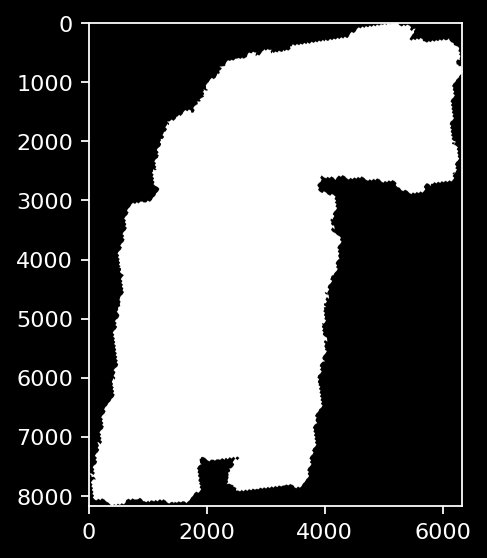

In [32]:
# Fragement mask
train_1_mask = Image.open("../vesuvius-challenge-ink-detection/train/1/mask.png")
fig, ax = plt.subplots(dpi=160)
ax.imshow(train_1_mask)

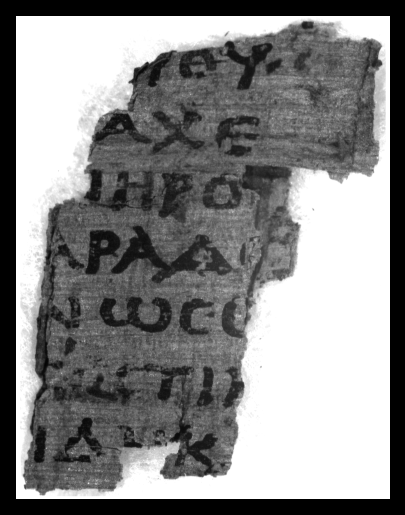

In [33]:
# Fragement infrared
train_1_ir = Image.open("../vesuvius-challenge-ink-detection/train/1/ir.png")
fig, ax = plt.subplots(dpi=160)
ax.axis('off')
ax.imshow(train_1_ir, cmap='gray')

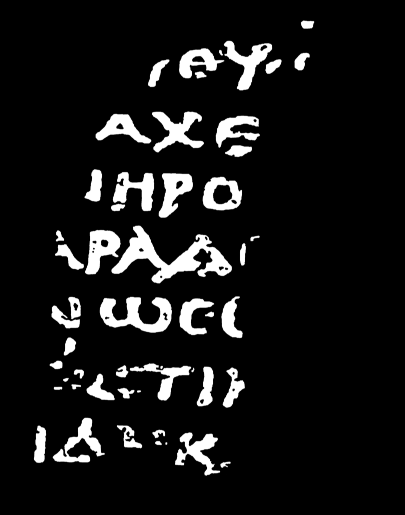

In [34]:
# Fragment ink mask - What we want to predict
train_1_inklabels = Image.open("../vesuvius-challenge-ink-detection/train/1/inklabels.png")
fig, ax = plt.subplots(dpi=160)
ax.axis('off')
ax.imshow(train_1_inklabels, cmap='gray');

In [35]:
first_train_volume = train_volumes_path_template.format(1)
train_volume_1 = load_volume(first_train_volume)
layers_count = len(train_volume_1)
bytes_size = layers_count * train_volume_1[0].size * train_volume_1[0].itemsize
animate_volume(train_volume_1)


100%|██████████████████| 65/65 [00:16<00:00,  3.92it/s]
